In [1]:
from keras import models, layers, losses, optimizers, metrics
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_dir = 'E:\\Datasets\\mnist_small\\train'
test_dir = 'E:\\Datasets\\mnist_small\\test'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(28, 28), 
    batch_size=32
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(28, 28), 
    batch_size=32
)

Found 4000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [3]:
for data_batch, label_batch in train_generator:
    print(data_batch.shape)
    print(label_batch.shape)
    break

(32, 28, 28, 3)
(32, 10)


In [4]:
def plot_images(images, cls_true, cls_pred=None):
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

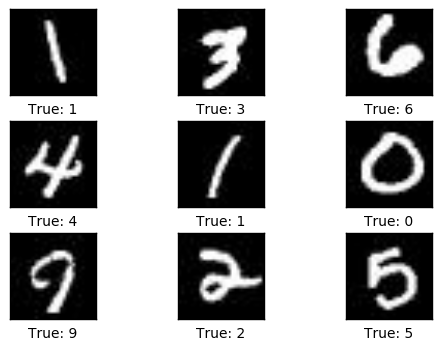

In [5]:
plot_images(data_batch[:9], np.argmax(label_batch[:9], axis=1))

# Deep neural network

In [6]:
model = models.Sequential()

model.add(layers.Flatten(input_shape=(28, 28, 3)))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2409472   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 2,419,722
Trainable params: 2,419,722
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=65)

Epoch 1/30
125/125 [==============================] - 3s 24ms/step - loss: 0.7863 - categorical_accuracy: 0.8162 - val_loss: 0.4376 - val_categorical_accuracy: 0.8915
Epoch 2/30
125/125 [==============================] - 2s 13ms/step - loss: 0.3400 - categorical_accuracy: 0.9093 - val_loss: 0.3531 - val_categorical_accuracy: 0.8997
Epoch 3/30
125/125 [==============================] - 2s 12ms/step - loss: 0.2546 - categorical_accuracy: 0.9305 - val_loss: 0.3246 - val_categorical_accuracy: 0.9084
Epoch 4/30
125/125 [==============================] - 2s 12ms/step - loss: 0.2068 - categorical_accuracy: 0.9437 - val_loss: 0.3006 - val_categorical_accuracy: 0.9118
Epoch 5/30
125/125 [==============================] - 2s 12ms/step - loss: 0.1750 - categorical_accuracy: 0.9553 - val_loss: 0.2675 - val_categorical_accuracy: 0.9191
Epoch 6/30
125/125 [==============================] - 1s 12ms/step - loss: 0.1472 - categorical_accuracy: 0.9617 - val_loss: 0.2736 - val_categorical_accuracy: 0.926

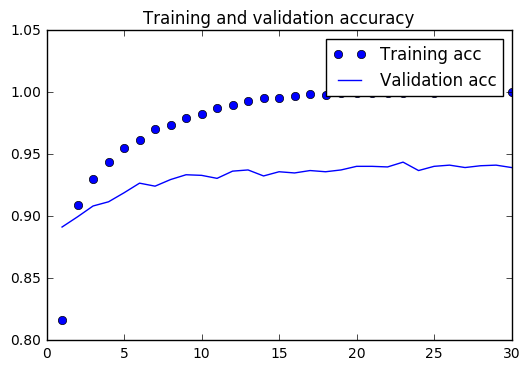

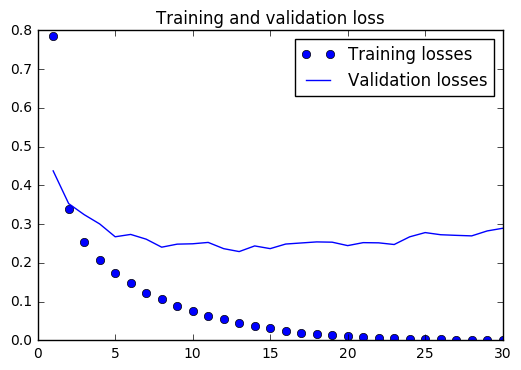

In [8]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Convolutional neural network

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total para

In [10]:
# Compile the model
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [11]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=65)

Epoch 1/30
125/125 [==============================] - 2s 18ms/step - loss: 1.2022 - categorical_accuracy: 0.7143 - val_loss: 0.5604 - val_categorical_accuracy: 0.8639
Epoch 2/30
125/125 [==============================] - 2s 12ms/step - loss: 0.3998 - categorical_accuracy: 0.8882 - val_loss: 0.3218 - val_categorical_accuracy: 0.9079
Epoch 3/30
125/125 [==============================] - 2s 13ms/step - loss: 0.2716 - categorical_accuracy: 0.9195 - val_loss: 0.2599 - val_categorical_accuracy: 0.9273
Epoch 4/30
125/125 [==============================] - 2s 12ms/step - loss: 0.2129 - categorical_accuracy: 0.9395 - val_loss: 0.2383 - val_categorical_accuracy: 0.9317
Epoch 5/30
125/125 [==============================] - 1s 12ms/step - loss: 0.1780 - categorical_accuracy: 0.9465 - val_loss: 0.1944 - val_categorical_accuracy: 0.9506
Epoch 6/30
125/125 [==============================] - 2s 13ms/step - loss: 0.1480 - categorical_accuracy: 0.9577 - val_loss: 0.1796 - val_categorical_accuracy: 0.950

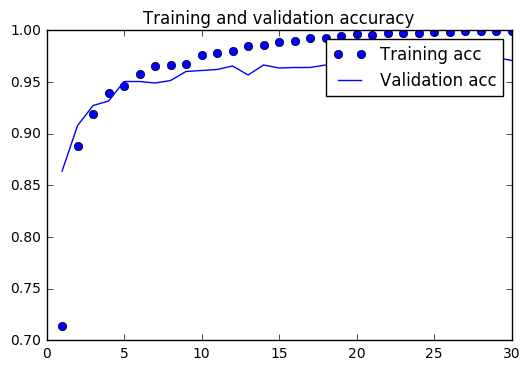

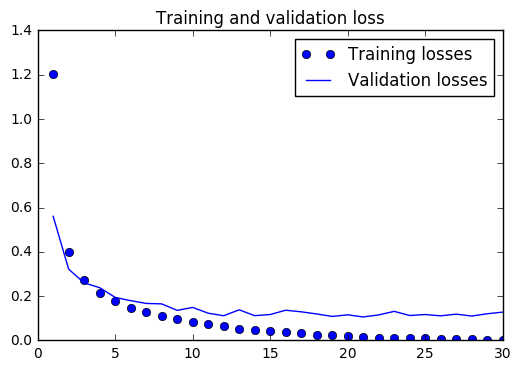

In [12]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# LSTM

In [13]:
model = models.Sequential()

model.add(layers.Reshape((28, 28*3), input_shape=(28, 28, 3)))
model.add(layers.LSTM(500, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 84)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 500)               1170000   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5010      
Total params: 1,175,010
Trainable params: 1,175,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

In [15]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=30, 
                              validation_data=test_generator, 
                              validation_steps=65)

Epoch 1/30
125/125 [==============================] - 6s 47ms/step - loss: 1.9027 - categorical_accuracy: 0.3365 - val_loss: 1.4299 - val_categorical_accuracy: 0.5126
Epoch 2/30
125/125 [==============================] - 5s 42ms/step - loss: 1.2988 - categorical_accuracy: 0.5563 - val_loss: 0.9774 - val_categorical_accuracy: 0.6744
Epoch 3/30
125/125 [==============================] - 5s 43ms/step - loss: 1.0049 - categorical_accuracy: 0.6458 - val_loss: 0.7597 - val_categorical_accuracy: 0.7408
Epoch 4/30
125/125 [==============================] - 5s 42ms/step - loss: 0.8111 - categorical_accuracy: 0.7283 - val_loss: 0.5861 - val_categorical_accuracy: 0.8033
Epoch 5/30
125/125 [==============================] - 5s 40ms/step - loss: 0.6621 - categorical_accuracy: 0.7680 - val_loss: 0.5122 - val_categorical_accuracy: 0.8319
Epoch 6/30
125/125 [==============================] - 5s 41ms/step - loss: 0.5828 - categorical_accuracy: 0.8060 - val_loss: 0.4462 - val_categorical_accuracy: 0.853

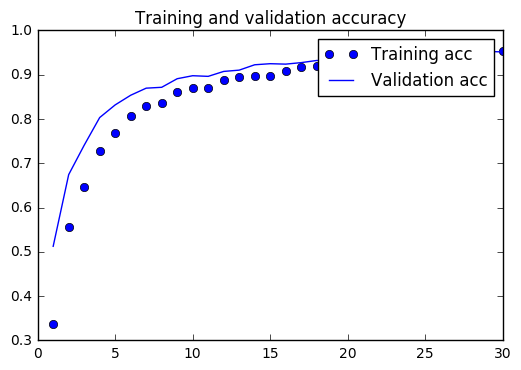

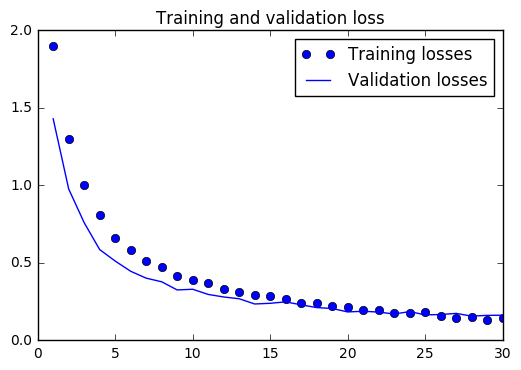

In [16]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()